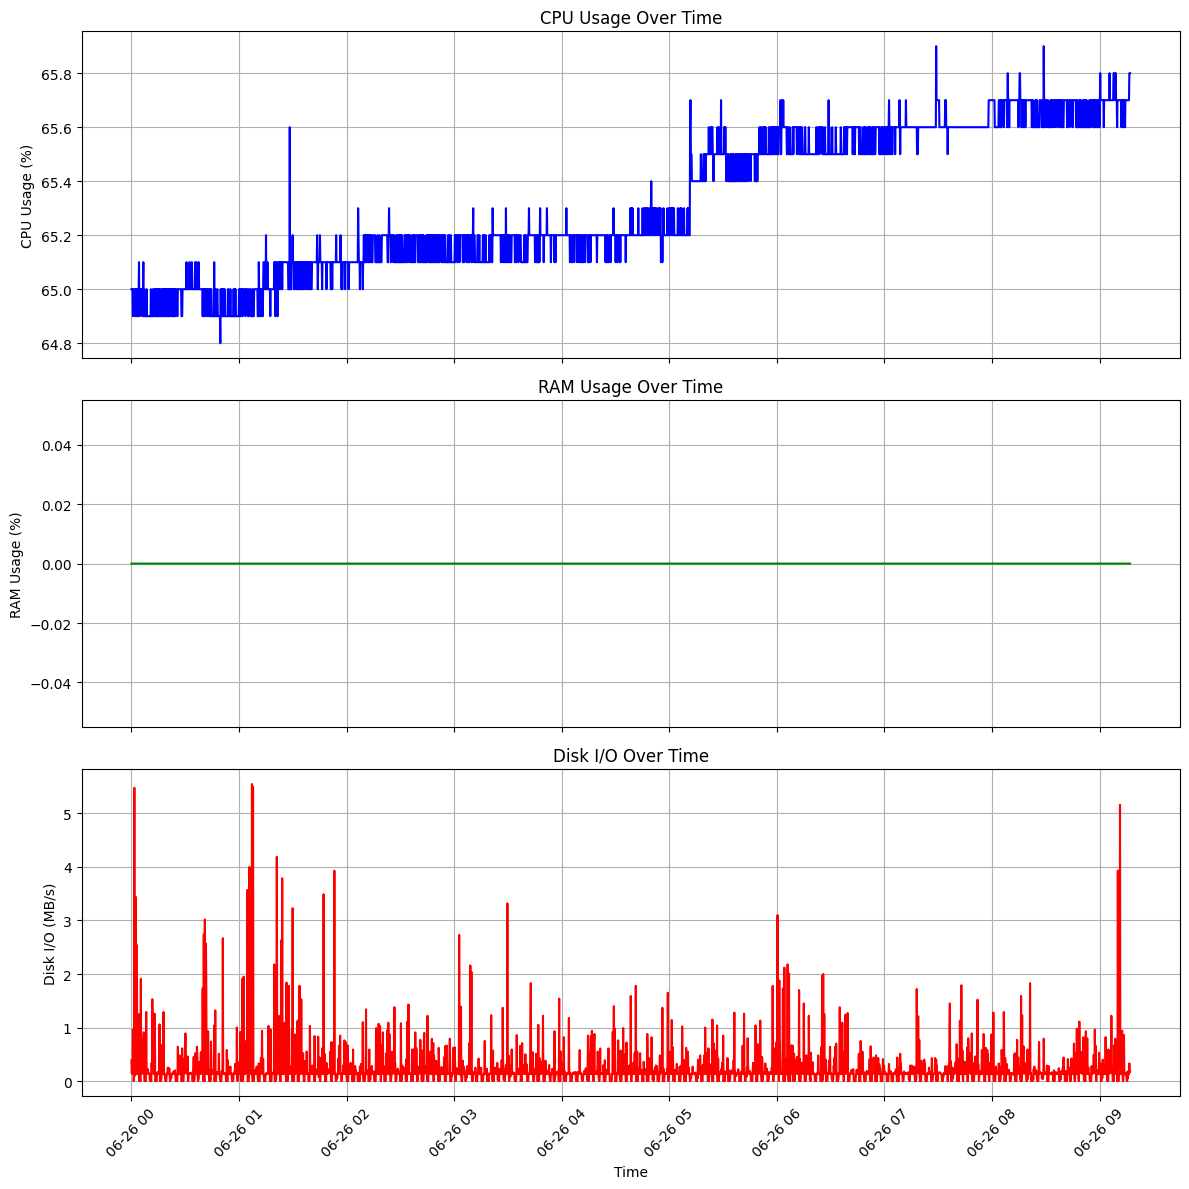

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Read the log file with UTF-8 encoding
with open('2025-06-26.txt', 'r', encoding='utf-8') as file:
    log_data = file.read()

# Parse the log data
lines = log_data.strip().split('\n')
timestamps = []
cpu_usage = []
ram_usage = []
disk_io = []

for line in lines:
    try:
        # Extract timestamp
        timestamp_str = line.split(']')[0][1:]
        timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
        timestamps.append(timestamp)
        
        # Extract CPU, RAM, and Disk I/O
        parts = line.split('|')
        cpu = float(parts[1].split(':')[1].strip().replace('%', ''))
        ram = float(parts[2].split(':')[1].strip().replace('%', ''))
        disk = float(parts[3].split(':')[1].strip().replace(' MB/s', ''))
        
        cpu_usage.append(cpu)
        ram_usage.append(ram)
        disk_io.append(disk)
    except (IndexError, ValueError) as e:
        print(f"Skipping line due to error: {line} ({e})")
        continue

# Create a DataFrame
df = pd.DataFrame({
    'Timestamp': timestamps,
    'CPU (%)': cpu_usage,
    'RAM (%)': ram_usage,
    'Disk I/O (MB/s)': disk_io
})

# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# Create separate plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot CPU Usage
ax1.plot(df.index, df['CPU (%)'], color='blue')
ax1.set_title('CPU Usage Over Time')
ax1.set_ylabel('CPU Usage (%)')
ax1.grid(True)

# Plot RAM Usage
ax2.plot(df.index, df['RAM (%)'], color='green')
ax2.set_title('RAM Usage Over Time')
ax2.set_ylabel('RAM Usage (%)')
ax2.grid(True)

# Plot Disk I/O
ax3.plot(df.index, df['Disk I/O (MB/s)'], color='red')
ax3.set_title('Disk I/O Over Time')
ax3.set_ylabel('Disk I/O (MB/s)')
ax3.grid(True)

# Common x-axis label
ax3.set_xlabel('Time')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plots inline
plt.show()